In [27]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import SimpleImputer


In [28]:
col_names = ['pregnancies', 'glu', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv', 
                 names=col_names, 
                 skiprows=1)

df


,pregnancies,glu,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
imp = SimpleImputer(strategy='mean')

error_cols = col_names[1:-1] #the fields here are inclusive:exclusive, hence 1:-1 for the second from left, and second last

df[error_cols] = df[error_cols].replace(0, np.nan) #replace zero values with NaN

#replace missing values with the mean using the "imp"
#df['skin'] = imp.fit_transform(df['skin'].values.reshape(-1, 1))
for column in error_cols:
    df[column] = imp.fit_transform(df[column].values.reshape(-1, 1))

df


,pregnancies,glu,bp,skin,insulin,bmi,pedigree,age,label
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1


In [30]:
features = col_names[:-1] #all columns except the last one
X = df[features]
y = df['label']

X


,pregnancies,glu,bp,skin,insulin,bmi,pedigree,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


Text(0.5, 1.0, 'Confusion Matrix')

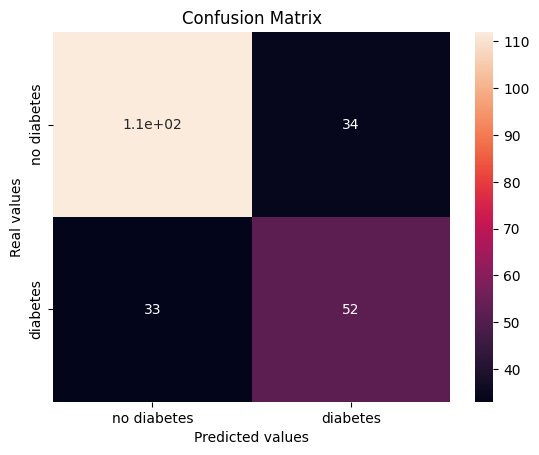

In [32]:
# Confusion matrix (done before)
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)

target_values = ['no diabetes', 'diabetes']

sns.heatmap(cm,
            annot=True,
            xticklabels=target_values,
            yticklabels=target_values)
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.title('Confusion Matrix')


In [33]:
print(f'Diabetes precision {51/82*100}')
print(f'Diabetes recall {51/85*100}')
 
print(f'No Diabetes precision {120/154*100}')
print(f'No Diabetes recall {120/151*100}')


Diabetes precision 62.19512195121951
Diabetes recall 60.0
No Diabetes precision 77.92207792207793
No Diabetes recall 79.47019867549669


In [34]:
from sklearn.metrics import classification_report
output_report = classification_report(y_test,
                                      y_pred,
                                      target_names=target_values,
                                      output_dict=True)
 
output_report


{'no diabetes': {'precision': 0.7724137931034483,
  'recall': 0.7671232876712328,
  'f1-score': 0.7697594501718213,
  'support': 146.0},
 'diabetes': {'precision': 0.6046511627906976,
  'recall': 0.611764705882353,
  'f1-score': 0.6081871345029239,
  'support': 85.0},
 'accuracy': 0.70995670995671,
 'macro avg': {'precision': 0.688532477947073,
  'recall': 0.6894439967767929,
  'f1-score': 0.6889732923373726,
  'support': 231.0},
 'weighted avg': {'precision': 0.710682955109579,
  'recall': 0.70995670995671,
  'f1-score': 0.7103064335836989,
  'support': 231.0}}

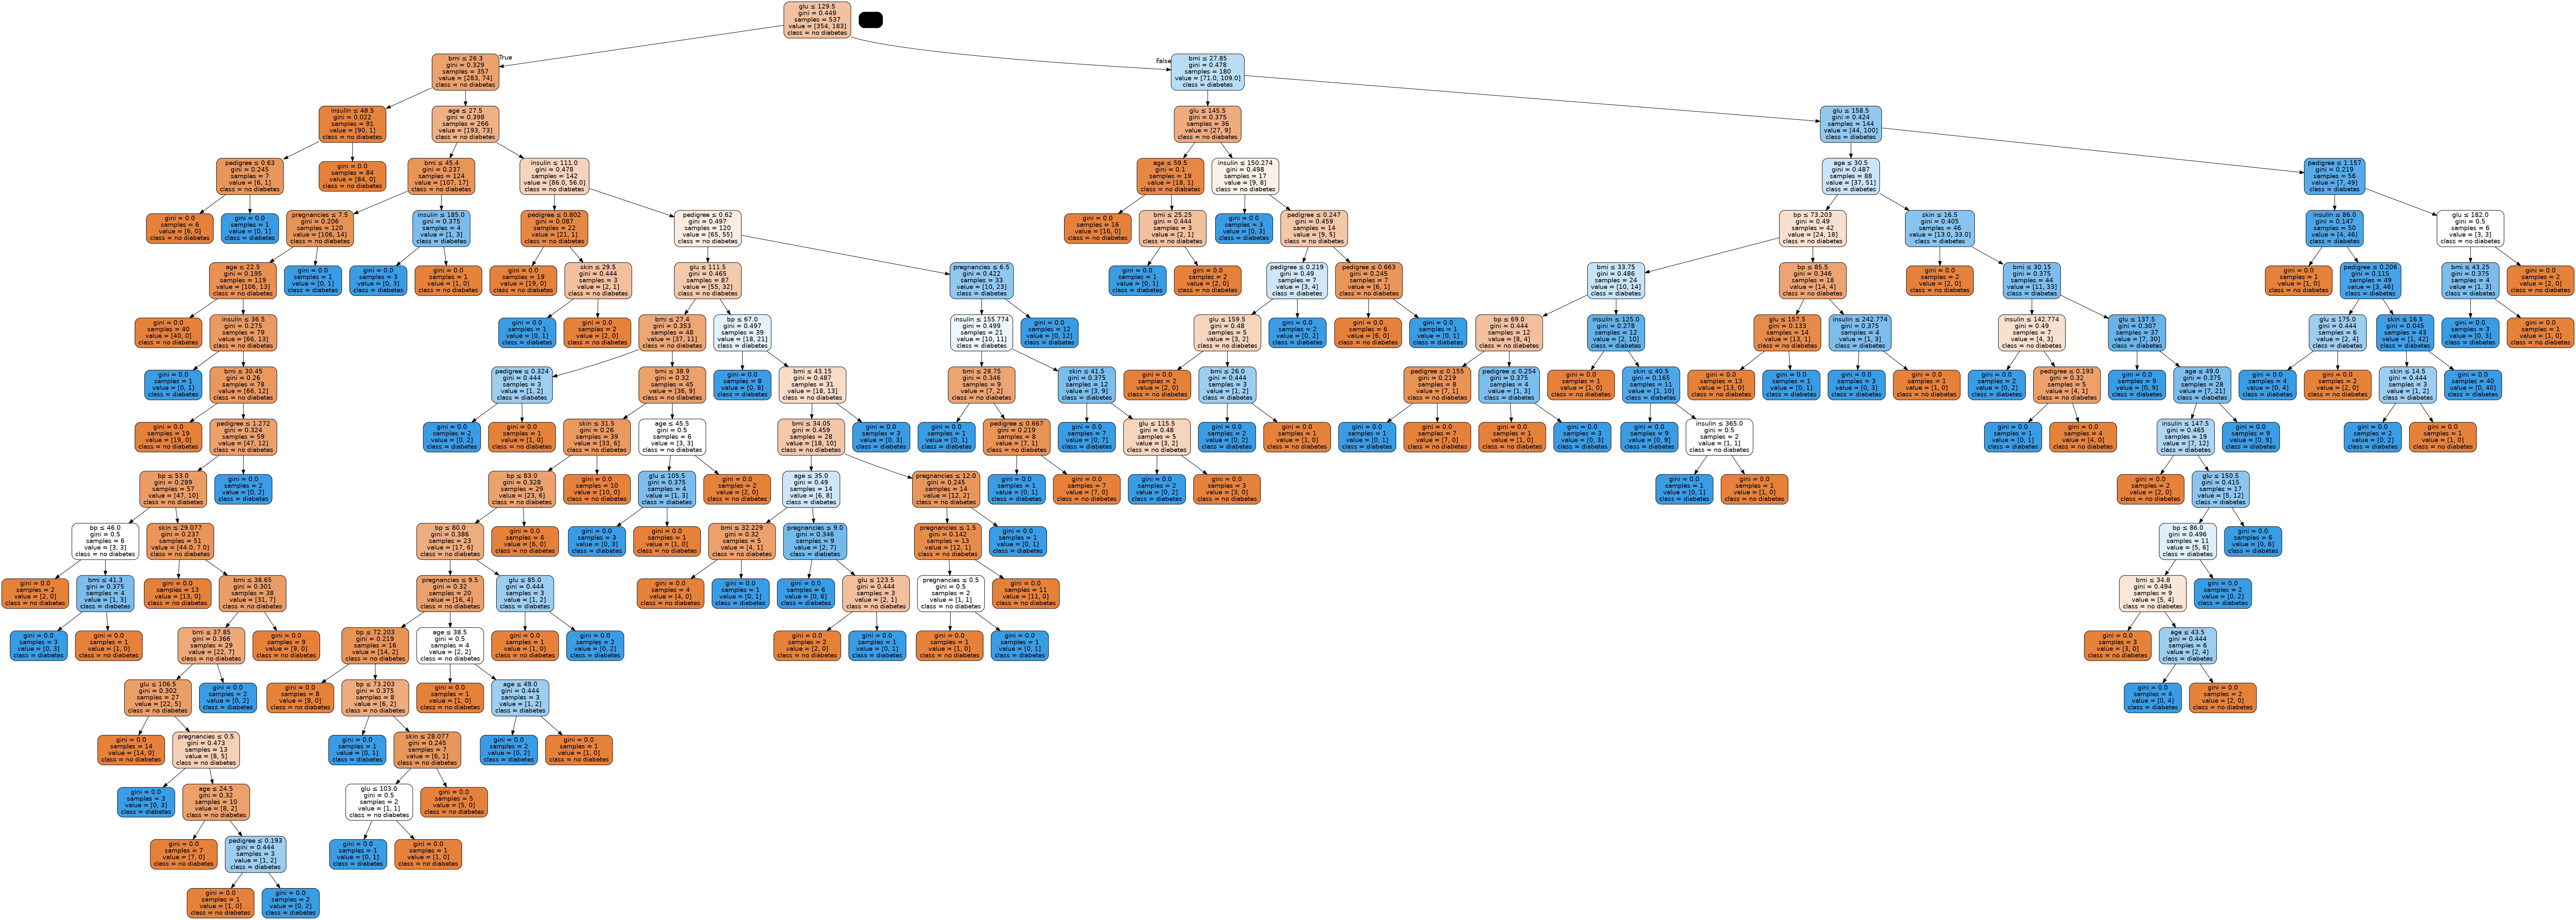

In [35]:
# pip install graphviz
# pip install pydotplus
# conda install graphviz
# I have no idea why we have to install graphviz twice, but this is how I could get it to work

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=target_values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# this gives you a fancy decision tree: 


In [36]:
'''The second attribute selection measure we looked at was entropy. 
Entropy is a measure of how homogenous the samples in a node are, or how random the samples in the node are. 
It can be though of as how messy the data is in a given node, or how much information our node gives us about the outcomes we want to predict. 
High entropy means the system is messy and doesn’t give us a lot of information about a prediction. 
When we use entropy as our splitting criteria, which we did for the second plot, 
this choses to split nodes will maximise the decrease in average entropy between nodes 
(this difference in average entropy is called information gain). 
Essentially then, when choosing entropy as our attribute selection method, we split nodes where, after that split, 
we have a more homogenous set of samples, which can be though of as having a better set of samples from which to make a prediction.'''

clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))


0.7662337662337663
